In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

fileName1 = './data/CMU_exp_shrink_output_rep50.xls'
df_ora = pd.read_excel(fileName1)

#object_user = 's002'
#object_user = 's032'
#object_user = 's036'
#object_user = 's047'
object_user = 's052'

df_ora.loc[df_ora['user']!=object_user,'user'] = 'imposter'
le = LabelEncoder()
df_ora['target'] = le.fit_transform(df_ora['user'])
y = df_ora['target'].values

'''
#s002
index_test1 = [i+200 for i in range(200)] #s002
index_test2 = [i+450 for i in range(350)]  #s032
index_test3 = [i+850 for i in range(350)]  #s036
index_test4 = [i+1250 for i in range(350)]  #s047
index_test5 = [i+1650 for i in range(350)]  #s052
'''

'''
#s032
index_test1 = [i+600 for i in range(200)] #s032
index_test2 = [i+50 for i in range(350)]  #s002
index_test3 = [i+850 for i in range(350)]  #s036
index_test4 = [i+1250 for i in range(350)]  #s047
index_test5 = [i+1650 for i in range(350)]  #s052
'''

'''
#s036
index_test1 = [i+1000 for i in range(200)] #s036
index_test2 = [i+50 for i in range(350)]  #s002
index_test3 = [i+450 for i in range(350)]  #s032
index_test4 = [i+1250 for i in range(350)]  #s047
index_test5 = [i+1650 for i in range(350)]  #s052
'''

'''
#s047
index_test1 = [i+1400 for i in range(200)] #s047
index_test2 = [i+50 for i in range(350)]  #s002
index_test3 = [i+450 for i in range(350)]  #s032
index_test4 = [i+850 for i in range(350)]  #s036
index_test5 = [i+1650 for i in range(350)]  #s052
'''


#s052
index_test1 = [i+1800 for i in range(200)] #s052
index_test2 = [i+50 for i in range(350)]  #s002
index_test3 = [i+450 for i in range(350)]  #s032
index_test4 = [i+850 for i in range(350)]  #s036
index_test5 = [i+1250 for i in range(350)]  #s047


index_test = index_test1 + index_test2 + index_test3 + index_test4 + index_test5
y_test = y[index_test]

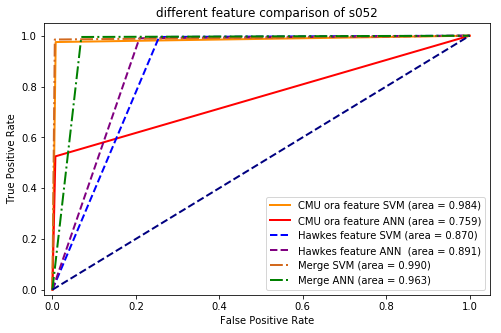

In [77]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
import numpy as np
import random

path = './result/predict_result_final/'


load_name1 = path + 'SVM_best'+object_user+'_CMU_pred_final_50.txt'
load_name2 = path + 'SVM_best'+object_user+'_Hawkes_pred_final_50.txt'
load_name3 = path + 'ANN_'+object_user+'_CMU_pred_final_50.txt'
load_name4 = path + 'ANN_'+object_user+'_Hawkes_pred_final_50.txt'
load_name5 = path + 'SVM_best'+object_user+'_merge_pred_final_rep50_50.txt'
load_name6 = path + 'ANN_'+object_user+'_merge_pred_final_rep50_50.txt'



#模型一,CMU 原始特征，SVM
pre_1 = np.loadtxt(load_name1).tolist()#模型的预测值
fpr_1, tpr_1, threshold_1 = roc_curve(y_test, pre_1)  ###计算真正率和假正率
roc_auc_1 = auc(fpr_1, tpr_1)  ###计算auc的值
 
#模型二,CMU 原始特征,ANN
pre_2 = np.loadtxt(load_name3).tolist()
fpr_2, tpr_2, threshold_2 = roc_curve(y_test, pre_2)
roc_auc_2 = auc(fpr_2, tpr_2)
 
#模型三,Hawkes, SVM
pre_3 = np.loadtxt(load_name2).tolist()
fpr_3, tpr_3, threshold_3 = roc_curve(y_test, pre_3)
roc_auc_3 = auc(fpr_3, tpr_3)
 
#模型四,Hawkes, ANN
pre_4 = np.loadtxt(load_name4).tolist()
fpr_4, tpr_4, threshold_4 = roc_curve(y_test, pre_4)
roc_auc_4 = auc(fpr_4, tpr_4)
 
#模型五,merge SVM
pre_5 = np.loadtxt(load_name5).tolist()
fpr_5, tpr_5, threshold_5 = roc_curve(y_test, pre_5)
roc_auc_5 = auc(fpr_5, tpr_5)

#模型六,merge ANN
pre_6 = np.loadtxt(load_name6).tolist()
fpr_6, tpr_6, threshold_6 = roc_curve(y_test, pre_6)
roc_auc_6 = auc(fpr_6, tpr_6)


 
plt.figure(figsize=(8, 5))
plt.plot(fpr_1, tpr_1, color='darkorange', ###假正率为横坐标，真正率为纵坐标做曲线
         lw=2, label='CMU ora feature SVM (area = %0.3f)' % roc_auc_1, linestyle='-')
plt.plot(fpr_2, tpr_2, color='red',
         lw=2, label='CMU ora feature ANN (area = %0.3f)' % roc_auc_2, linestyle='-')
plt.plot(fpr_3, tpr_3, color='blue',
         lw=2, label='Hawkes feature SVM (area = %0.3f)' % roc_auc_3, linestyle='--')
plt.plot(fpr_4, tpr_4, color='#800080',
         lw=2, label='Hawkes feature ANN  (area = %0.3f)' % roc_auc_4, linestyle='--')
plt.plot(fpr_5, tpr_5, color='#D2691E',
         lw=2, label='Merge SVM (area = %0.3f)' % roc_auc_5, linestyle='-.')
plt.plot(fpr_6, tpr_6, color='green',
         lw=2, label='Merge ANN (area = %0.3f)' % roc_auc_6, linestyle='-.')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.02, 1.05])#横竖增加一点长度 以便更好观察图像
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('different feature comparison of '+object_user)
plt.legend(loc="lower right")
save_file = path + object_user+'_50samples.png'
plt.savefig(save_file,dpi=600)#保存图片，dpi设置分辨率
plt.show()

In [26]:
len(y_test)

1600

In [22]:
len(pre_1)

1600